Start here

----- Training Blending Models for All Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Sim Blending Technique Ensemble (All Features) Metrics:
Accuracy: 0.9999445445453237
Precision: 0.9998890927574765
Recall: 0.9999445445453237
F1 Score: 0.9999168177347264


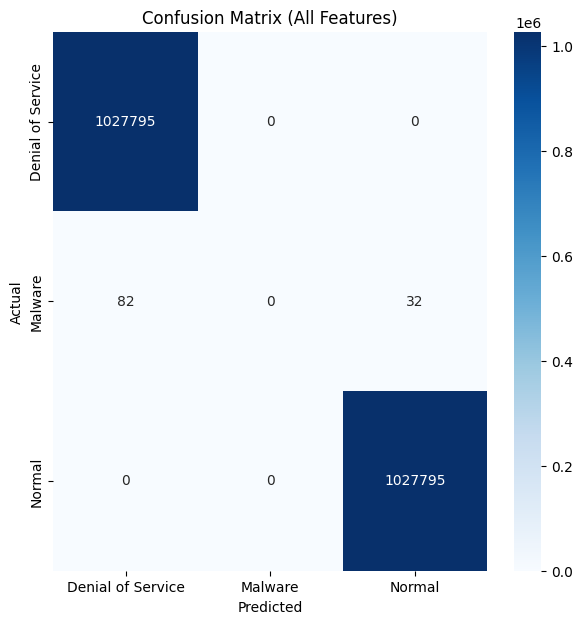

Start here

----- Training Blending Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Sim Blending Technique Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9999445445453237
Precision: 0.9998890952409212
Recall: 0.9999445445453237
F1 Score: 0.9999168183556392


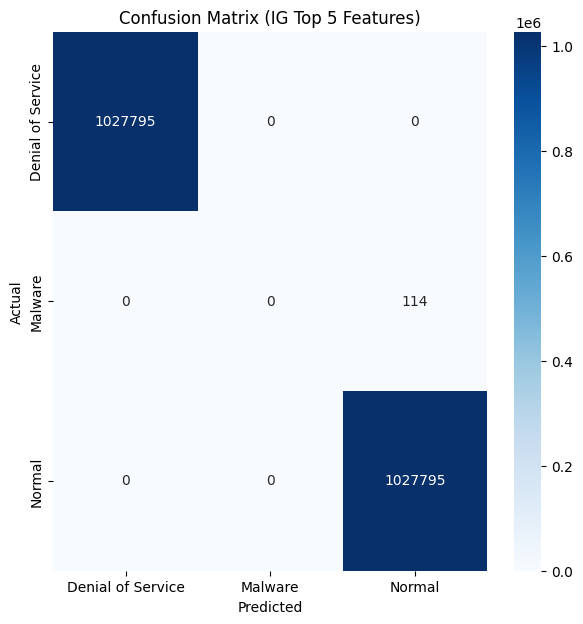

Start here

----- Training Blending Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Sim Blending Technique Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9999445445453237
Precision: 0.9998890952409212
Recall: 0.9999445445453237
F1 Score: 0.9999168183556392


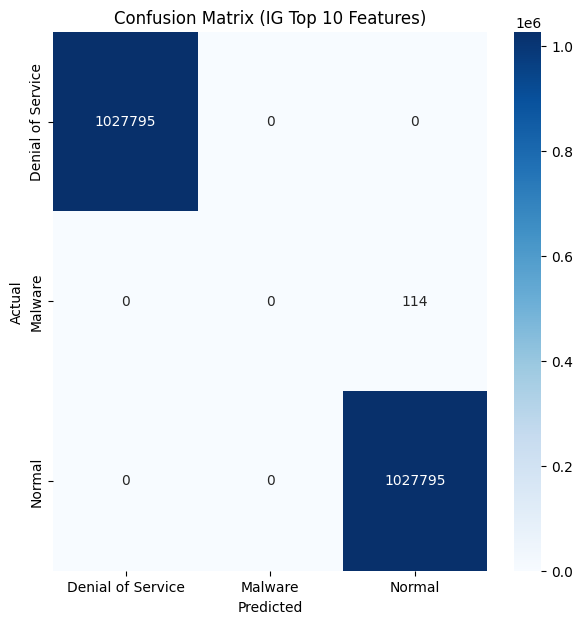

Start here

----- Training Blending Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Sim Blending Technique Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9999406529344692
Precision: 0.9998852017977959
Recall: 0.9999406529344692
F1 Score: 0.9999129263699721


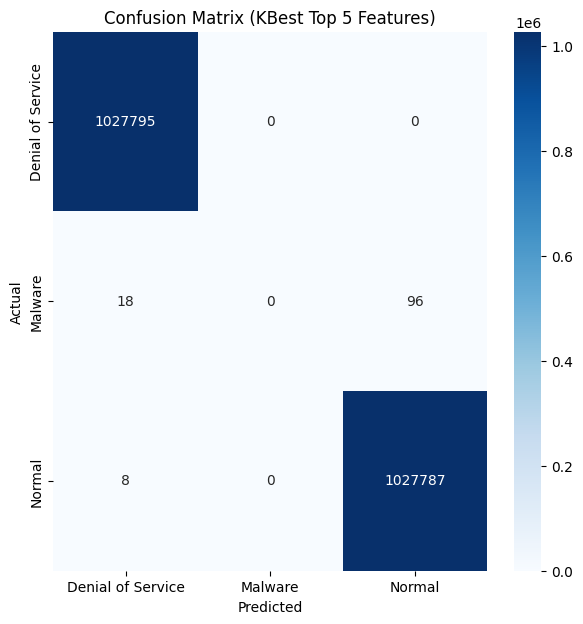

Start here

----- Training Blending Models for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Sim Blending Technique Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9999421122885396
Precision: 0.9998866627262492
Recall: 0.9999421122885396
F1 Score: 0.9999143860988591


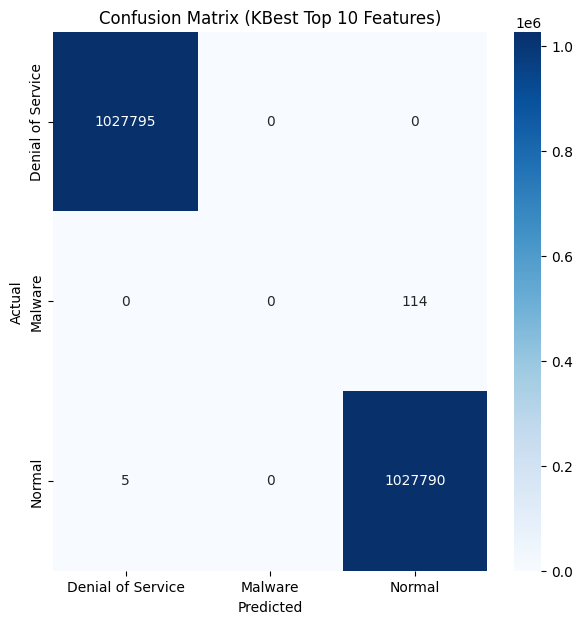

In [1]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from Simargl import data_preprocessing, evaluate_model, plot_confusion_matrix

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train, y_test) in datasets.items():
    print("Start here")
    print(f"\n----- Training Blending Models for {name} -----")

    X_base_tr, X_meta_tr, y_base_tr, y_meta_tr = train_test_split(X_tr, y_train, test_size=0.2, random_state=42)

    start_time = time.time()

    model1 = DecisionTreeClassifier()
    model2 = CatBoostClassifier(verbose=0)  
    model3 = RandomForestClassifier()

    model1.fit(X_base_tr, y_base_tr)
    model2.fit(X_base_tr, y_base_tr)
    model3.fit(X_base_tr, y_base_tr)

    pred1_meta = model1.predict_proba(X_meta_tr)
    pred2_meta = model2.predict_proba(X_meta_tr)
    pred3_meta = model3.predict_proba(X_meta_tr)

    meta_train_data = np.hstack((pred1_meta, pred2_meta, pred3_meta))

    meta_model = LogisticRegression()
    meta_model.fit(meta_train_data, y_meta_tr)

    train_end_time = time.time()

    pred1_test = model1.predict_proba(X_te)
    pred2_test = model2.predict_proba(X_te)
    pred3_test = model3.predict_proba(X_te)

    meta_test_data = np.hstack((pred1_test, pred2_test, pred3_test))
    final_predictions = meta_model.predict(meta_test_data)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, final_predictions, f"Sim Blending Technique Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, final_predictions, le.classes_, f"Confusion Matrix ({name})")


In [2]:
# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Sim_Blending_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0     Sim Blending Technique Ensemble (All Features)  0.999945   0.999889   
1  Sim Blending Technique Ensemble (IG Top 5 Feat...  0.999945   0.999889   
2  Sim Blending Technique Ensemble (IG Top 10 Fea...  0.999945   0.999889   
3  Sim Blending Technique Ensemble (KBest Top 5 F...  0.999941   0.999885   
4  Sim Blending Technique Ensemble (KBest Top 10 ...  0.999942   0.999887   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.999945  0.999917        3929.993102             6.498529     3936.491630  
1  0.999945  0.999917         952.838052             6.436165      959.274218  
2  0.999945  0.999917        1482.815047             9.267793     1492.082840  
3  0.999941  0.999913        1029.718479             6.515986     1036.234465  
4  0.999942  0.999914        1997.981433            13.453222     2011.434655  
